In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import ta
import evaluation
import strategy

In [2]:
data = yf.download(
    "SPY",
    start="1990-01-01",
    end="2021-01-01",
    auto_adjust = True,
    group_by="Ticker",
)

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Volume
Date,,,,,
1993-01-29,25.735685,25.735685,25.607647,25.717394,1003200
1993-02-01,25.735675,25.900295,25.735675,25.900295,480500
1993-02-02,25.882005,25.973461,25.827131,25.955170,201300
1993-02-03,25.991740,26.247816,25.973448,26.229525,529400
1993-02-04,26.320982,26.394147,26.028324,26.339273,531500
...,...,...,...,...,...
2020-12-24,364.514223,365.455032,363.890351,365.425323,26457900
2020-12-28,368.138779,368.980551,367.475286,368.564636,39000400
2020-12-29,370.188721,370.376883,367.237579,367.861481,53680500


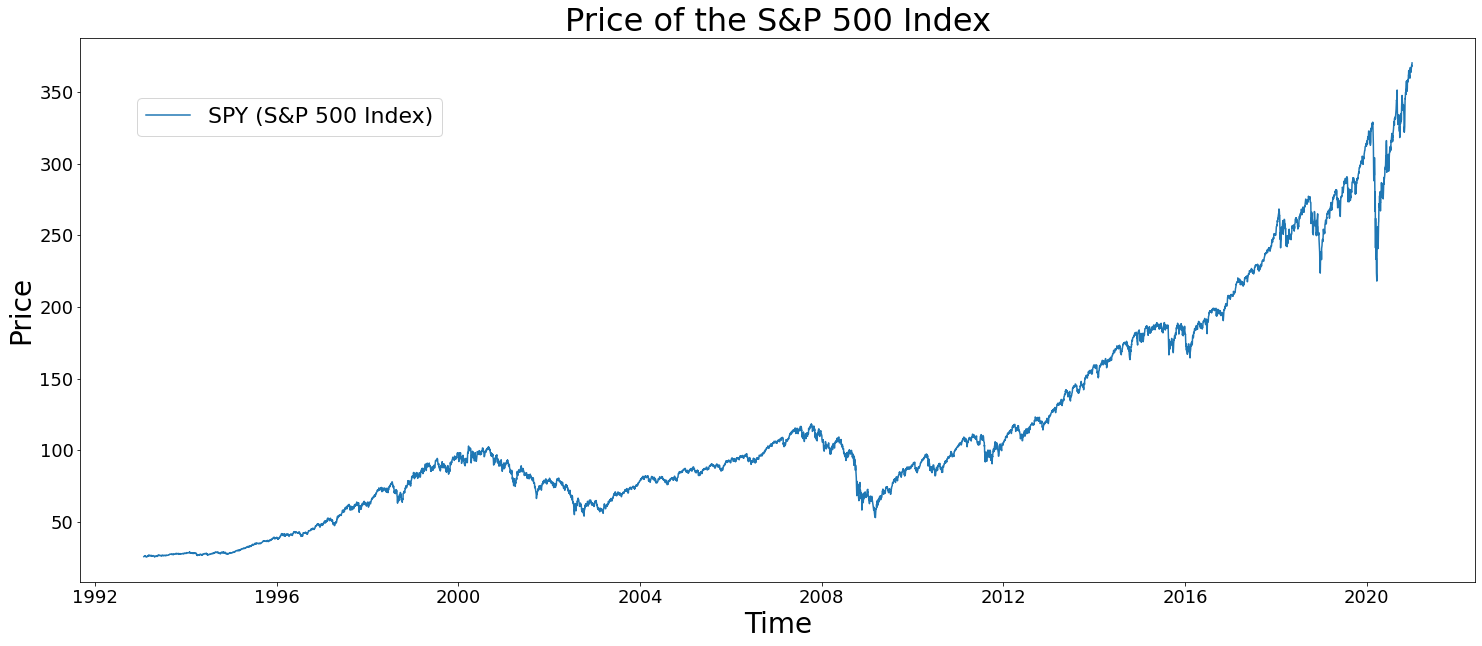

In [4]:
plt.figure(figsize=(25,10))

plt.plot(data['Close'], label='SPY (S&P 500 Index)')

plt.legend(loc='lower center', bbox_to_anchor=(0.15, 0.8), fontsize=22)

plt.title('Price of the S&P 500 Index', fontsize=32)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)
plt.ylabel('Price', fontsize=28)

plt.show()

In [5]:
comb = ta.utils.dropna(data)
comb = ta.add_all_ta_features(comb, "Open", "High", "Low", "Close", "Volume", fillna=True)
comb

/Users/qingweilan/.pyenv/versions/3.8.12/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/Users/qingweilan/.pyenv/versions/3.8.12/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
1993-01-29,25.735685,25.735685,25.607647,25.717394,1003200,7.165714e+05,1003200,0.714286,0.000000e+00,50.000000,...,-14.285714,0.000000,25.717394,0.000000,0.000000,0.000000,0.000000,-78.072331,0.000000,0.000000
1993-02-01,25.735675,25.900295,25.735675,25.900295,480500,1.197071e+06,1483700,0.806815,8.788411e+04,100.000000,...,-0.000000,0.000000,25.796559,0.000000,-4.323242,-0.864648,-3.458593,0.711197,0.708680,0.711197
1993-02-02,25.882005,25.973461,25.827131,25.955170,201300,1.348046e+06,1685000,0.800028,7.690727e+04,100.000000,...,-5.000128,0.000000,25.864695,0.000000,-10.591177,-2.809954,-7.781223,0.211868,0.211644,0.924572
1993-02-03,25.991740,26.247816,25.973448,26.229525,529400,1.806860e+06,2214400,0.815959,8.666959e+04,100.000000,...,-2.857240,0.000000,26.020454,0.000000,-12.679267,-4.783817,-7.895450,1.057034,1.051486,1.991379
1993-02-04,26.320982,26.394147,26.028324,26.339273,531500,2.178910e+06,2745900,0.793514,8.262129e+04,100.000000,...,-6.976920,0.000000,26.156650,0.000000,-14.306893,-6.688432,-7.618461,0.418417,0.417544,2.418128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,364.514223,365.455032,363.890351,365.425323,26457900,3.703786e+10,18313103800,0.165830,-3.162405e+05,52.560427,...,-56.505076,6.603022,360.679171,0.108835,-5.156019,-1.866065,-3.289954,0.389039,0.388284,1320.926729
2020-12-28,368.138779,368.980551,367.475286,368.564636,39000400,3.705530e+10,18352104200,0.170139,1.721957e+07,57.605606,...,-37.570357,6.455416,361.484339,1.882637,-7.785129,-3.049878,-4.735252,0.859085,0.855415,1333.133692
2020-12-29,370.188721,370.376883,367.237579,367.861481,53680500,3.702296e+10,18298423700,0.115835,9.367385e+06,58.167924,...,-41.811430,6.456471,362.344121,1.721532,-7.863349,-4.012572,-3.850777,-0.190782,-0.190964,1330.399528


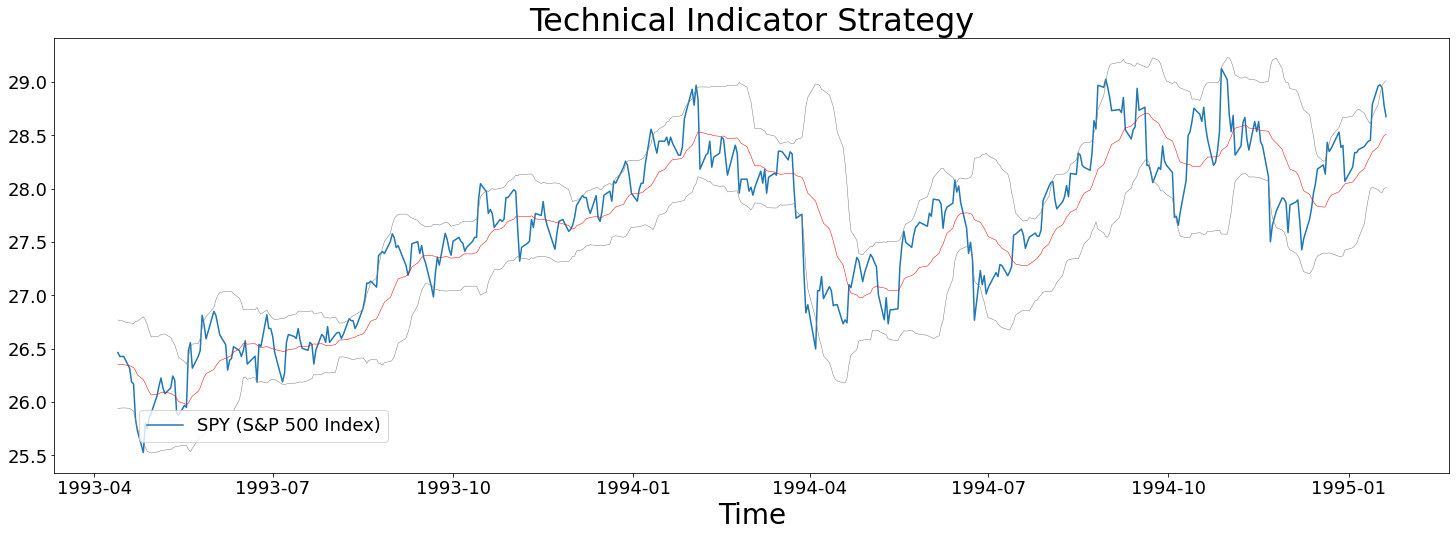

In [6]:
start, end = 50, 500

plt.figure(figsize=(25,8))

plt.plot(comb[start:end]['Close'], label='SPY (S&P 500 Index)')
plt.plot(comb[start:end]['volatility_bbl'], color='gray', linewidth=0.5)
plt.plot(comb[start:end]['volatility_bbh'], color='gray', linewidth=0.5)
plt.plot(comb[start:end]['volatility_bbm'], color='red', linewidth=0.5)

plt.legend(loc='lower center', bbox_to_anchor=(0.15, 0.05), fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)

plt.title('Technical Indicator Strategy', fontsize=32)

plt.show()

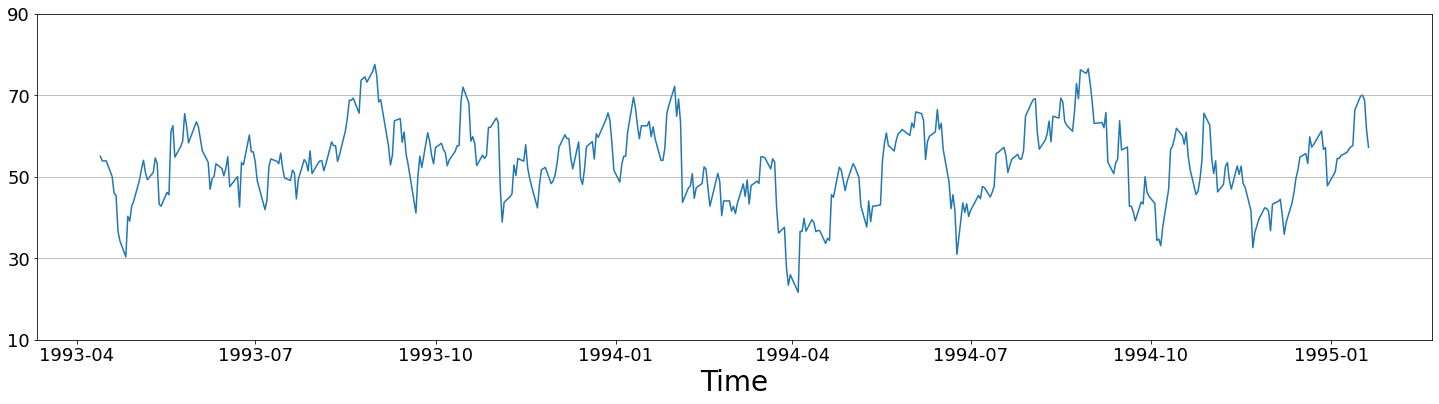

In [7]:
start, end = 50, 500

plt.figure(figsize=(25,6))

plt.plot(comb[start:end]['momentum_rsi'])

plt.xticks(fontsize=18)
plt.yticks(range(10,100,20), fontsize=18)
plt.xlabel('Time', fontsize=28)

plt.axhline(30, color='gray', linewidth=0.5)
plt.axhline(50, color='gray', linewidth=0.5)
plt.axhline(70, color='gray', linewidth=0.5)

plt.show()

In [8]:
bb = comb[50:-1][["Open","Close","Volume",'momentum_rsi','volatility_bbl','volatility_bbh','volatility_bbm']]
actions = ['H']
for _, row in bb.iterrows():
    price = row['Close']
    if price <= row['volatility_bbl']:
        actions.append('B')
    elif price >= row['volatility_bbh']:
        actions.append('S')
    else:
        actions.append('H')

actions.pop()
bb['action'] = actions
bb

,Open,Close,Volume,momentum_rsi,volatility_bbl,volatility_bbh,volatility_bbm,action
Date,,,,,,,,
1993-04-13,26.390168,26.463678,146100,55.000895,25.940379,26.769375,26.354877,H
1993-04-14,26.482058,26.426926,119600,53.883141,25.941264,26.758964,26.350114,H
1993-04-15,26.408548,26.426926,148600,53.883141,25.943364,26.763800,26.353582,H
1993-04-16,26.445303,26.426926,47900,53.883141,25.944370,26.753268,26.348819,H
1993-04-19,26.426923,26.316658,157000,50.070128,25.940597,26.740502,26.340550,H
...,...,...,...,...,...,...,...,...
2020-12-23,364.712299,364.009186,46201400,59.861341,357.089472,367.864806,362.477139,H
2020-12-24,364.514223,365.425323,26457900,62.058511,357.823226,367.911354,362.867290,H
2020-12-28,368.138779,368.564636,39000400,66.443703,358.136366,368.592845,363.364606,H


In [45]:
bb = comb[-1402:-1][["Open","Close","Volume",'momentum_rsi','volatility_bbl','volatility_bbh','volatility_bbm']]
bought, actions = False, ['H']
for _, row in bb.iterrows():
    price = row['Close']
    if not bought and price > row['volatility_bbm'] and row['momentum_rsi'] > 50:
        bought = True
        actions.append('B')
    elif bought and price < row['volatility_bbl']:
        bought = False
        actions.append('S')
    else:
        actions.append('H')

actions.pop()
bb['action'] = actions

In [9]:
evaluation.eval(bb)

Performance: 492.36%


,value,percentage
Date,,
1993-04-13,100000.000000,0.000000
1993-04-14,100000.000000,0.000000
1993-04-15,100000.000000,0.000000
1993-04-16,100000.000000,0.000000
1993-04-19,100000.000000,0.000000
...,...,...
2020-12-23,585325.356621,485.325357
2020-12-24,587602.500534,487.602501
2020-12-28,592650.503231,492.650503


In [10]:
macd_perf = evaluation.eval(strategy.macd(data, start=50, end=-1))

/Users/qingweilan/.pyenv/versions/3.8.12/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/Users/qingweilan/.pyenv/versions/3.8.12/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


Performance: 9352.82%


In [11]:
bh_perf = evaluation.eval(strategy.bh(data, start=50, end=-1))

Performance: 1295.92%


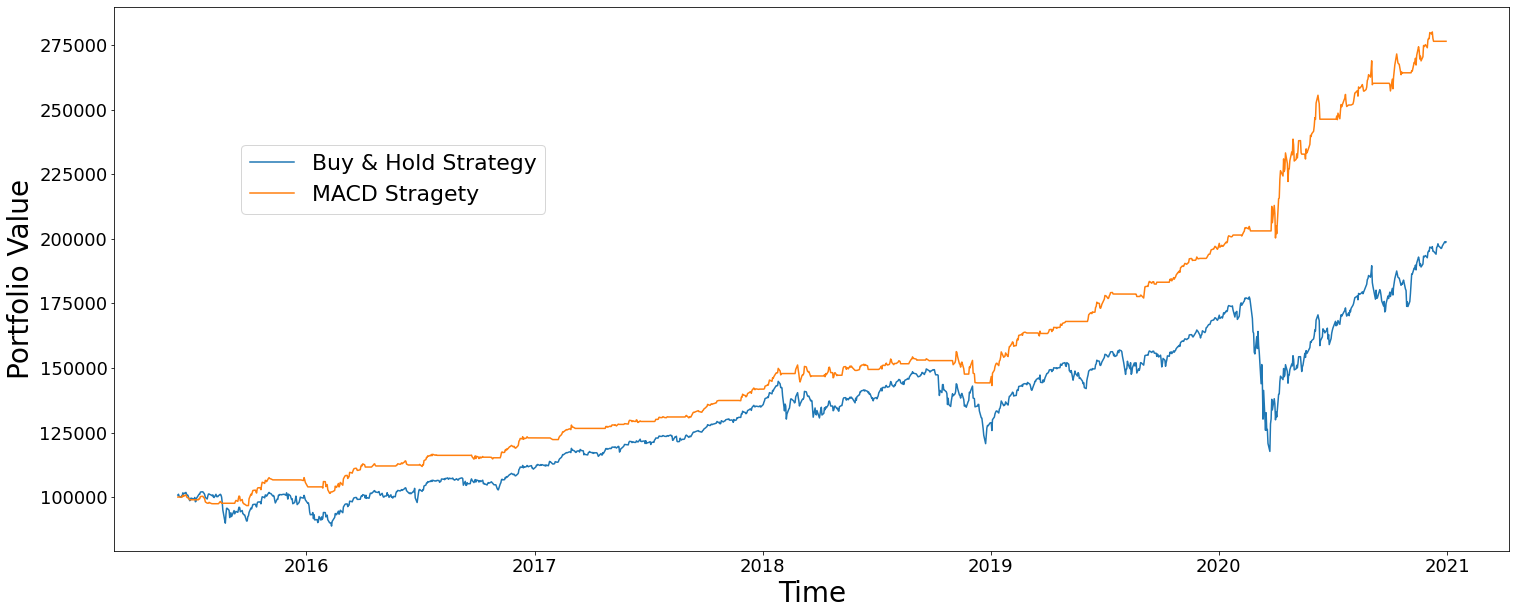

In [9]:
plt.figure(figsize=(25,10))

plt.plot(bh_perf['value'], label='Buy & Hold Strategy')
plt.plot(macd_perf['value'], label='MACD Stragety')

plt.legend(loc='lower center', bbox_to_anchor=(0.2, 0.6), fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)
plt.ylabel('Portfolio Value', fontsize=28)

plt.show()

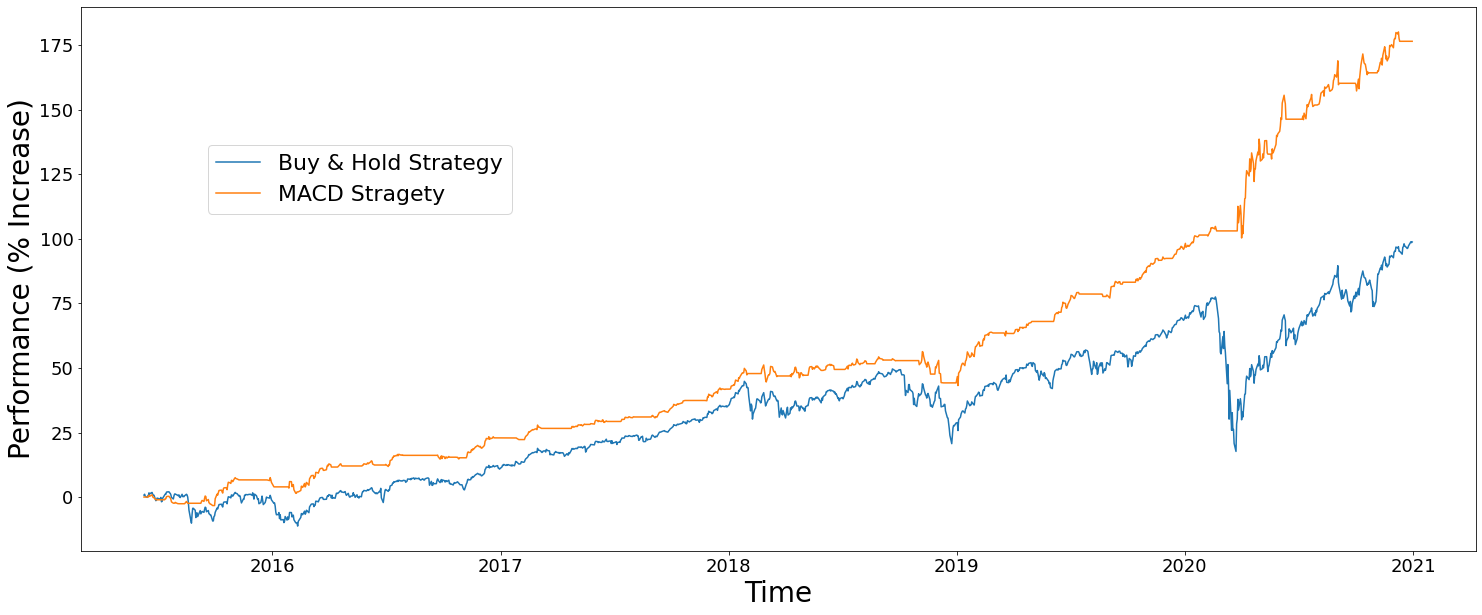

In [10]:
plt.figure(figsize=(25,10))

plt.plot(bh_perf['percentage'], label='Buy & Hold Strategy')
plt.plot(macd_perf['percentage'], label='MACD Stragety')

plt.legend(loc='lower center', bbox_to_anchor=(0.2, 0.6), fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)
plt.ylabel('Performance (% Increase)', fontsize=28)

plt.show()